In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
# get all csv and store as pandas dataframe
chunk = pd.read_csv('../data/backflow_data.csv',chunksize=1001, sep=",")
pd_df = pd.concat(chunk)
df = pd.DataFrame(pd_df)

# function to sort data by id
data = df.values.tolist()

  
def id_sort(arr, ascending=True):
    n = len(arr)  
    for i in range(n-1):  
        for j in range(0, n-i-1):
           # compare ID and swap 
            if ascending:
                if arr[j][0] > arr[j + 1][0] :
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]
            if not ascending: 
                if arr[j][0] < arr[j + 1][0] :
                    arr[j], arr[j + 1] = arr[j + 1], arr[j]

In [16]:
def scatterPlotData(data, label, color):
    y = data
    x = range(0, len(data))
    plt.scatter(x, y, c=color)
    plt.xlabel("Avg at each interval")
    plt.ylabel(label)
    plt.show()
    
def getAvgData(data, interval, isAscending=True):
    #sort by id
    id_sort(data, isAscending)
    avgs = {"avg_temperature":[], "avg_pressure":[], "avg_backflow":[]}
    counter=0
    totals = [0,0,0]
    for temp in data:
        # total temp
        totals[0] = totals[0] + float(temp[1].split("%")[0])
        # total pressure
        totals[1] = totals[1] + float(temp[2].split("%")[0])
        # total backflow
        totals[2] = totals[2] + float(temp[3].split("%")[0])
        counter = counter + 1
        if counter % interval == 0:
            avgs['avg_temperature'].append(totals[0]/counter)
            avgs['avg_pressure'].append(totals[1]/counter)
            avgs['avg_backflow'].append(totals[2]/counter)
            totals[0]=0
            totals[1]=0
            totals[2]=0
            counter =0
    return avgs
avg_data = getAvgData(data, 100, isAscending=True)

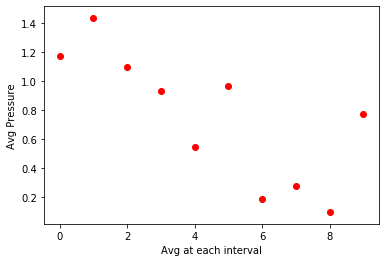

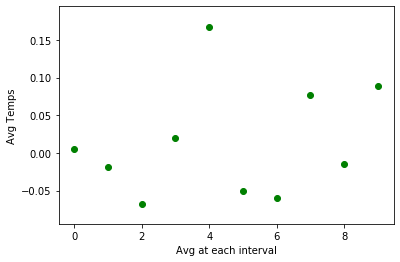

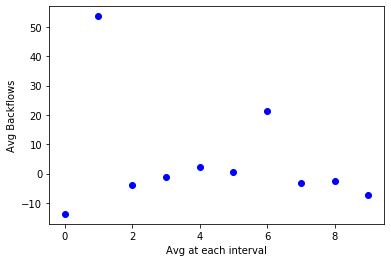

In [20]:
scatterPlotData(avg_data['avg_pressure'], "Avg Pressure", 'r')
scatterPlotData(avg_data['avg_temperature'], "Avg Temps", 'g')
scatterPlotData(avg_data['avg_backflow'], "Avg Backflows", 'b')